In [1]:
import pandas as pd 

tsv_file='C:\\Users\\USER\\Downloads\\440\\New folder\\Submitted Assingments to Farig sir\\Project\OLIDv1.0\\data.tsv'

# readinag given tsv file 
csv_table=pd.read_table(tsv_file,sep='\t') 

# converting tsv file into csv 
csv_table.to_csv('data.csv',index=False) 

In [2]:
df = pd.read_csv("C:\\Users\\USER\\Downloads\\440\\New folder\\Submitted Assingments to Farig sir\\Project\\data.csv")

In [3]:
df.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [4]:
df_subtask_a = df[['tweet','subtask_a']] #taking only the subtask_a featur

# preprossing the data

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import string

* The clean_tweets function below was borrowed from a kaggle notebook as this performs text cleaning efficiently. 

In [6]:
def clean_tweets(df):
    
    punctuations = string.punctuation
    
    df.loc[:, 'tweet'] = df.tweet.str.replace('@USER', '') #Remove mentions (@USER)
    df.loc[:, 'tweet'] = df.tweet.str.replace('URL', '') #Remove URLs
    df.loc[:, 'tweet'] = df.tweet.str.replace('&amp', 'and') #Replace ampersand (&) with and
    df.loc[:, 'tweet'] = df.tweet.str.replace('&lt','') #Remove &lt
    df.loc[:, 'tweet'] = df.tweet.str.replace('&gt','') #Remove &gt
    df.loc[:, 'tweet'] = df.tweet.str.replace('\d+','') #Remove numbers
    df.loc[:, 'tweet'] = df.tweet.str.lower() #Lowercase

    #Remove punctuations
    for punctuation in punctuations:
        df.loc[:, 'tweet'] = df.tweet.str.replace(punctuation, '')

    df.loc[:, 'tweet'] = df.astype(str).apply(
        lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii')
    )
    #Remove emojis
    df.loc[:, 'tweet'] = df.tweet.str.strip() #Trim leading and trailing whitespaces

In [7]:
clean_tweets(df_subtask_a)

C:\Users\USER\AppData\Local\ActiveState\cache\b3f68620\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
<ipython-input-6-77b4f79d41a5>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[:, 'tweet'] = df.tweet.str.replace('\d+','') #Remove numbers
<ipython-input-6-77b4f79d41a5>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.loc[:, 'tweet'] = df.tweet.str.replace(punctuation, '')


In [8]:
df_subtask_a.loc[0,'tweet']

'she should ask a few native americans what their take on this is'

### In the stop_words_remove function, I have used tokenization

In [9]:
def stop_words_remove(li):
   
    stop_words = set(stopwords.words('english'))

    from nltk.tokenize import word_tokenize
    from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+')

    for key,value in enumerate(df_subtask_a['tweet']):
        word_tokenized = word_tokenize(value)
        string_to_be_append = ""
        tokens = tokenizer.tokenize(value)
        for w in word_tokenized:
            if w not in stop_words and w in tokens:
                string_to_be_append += w
                string_to_be_append += " "
        li.append(string_to_be_append)

In [10]:
li_for_cleaning_stop_words_and_puntuation = []
stop_words_remove(li_for_cleaning_stop_words_and_puntuation)

In [11]:
df_subtask_a.loc[0:5,'tweet']

0    she should ask a few native americans what the...
1                      go home youre drunk  maga trump
2    amazon is investigating chinese employees who ...
3    someone shouldvetaken this piece of shit to a ...
4    obama wanted liberals and illegals to move int...
5                              liberals are all kookoo
Name: tweet, dtype: object

In [12]:
li_for_cleaning_stop_words_and_puntuation[0:5] # stop words removed

['ask native americans take ',
 'go home youre drunk maga trump ',
 'amazon investigating chinese employees selling internal data thirdparty sellers looking edge competitive marketplace amazon maga kag china tcot ',
 'someone shouldvetaken piece shit volcano ',
 'obama wanted liberals illegals move red states ']

In [13]:
df_subtask_a['tweet'] = li_for_cleaning_stop_words_and_puntuation

<ipython-input-13-e2d3025a377c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subtask_a['tweet'] = li_for_cleaning_stop_words_and_puntuation


In [14]:
df_subtask_a.loc[0,'tweet'] #stop words less dataframe

'ask native americans take '

### checking the null values in the dataset  and categorical values in the label

In [15]:
df_subtask_a.isnull().sum()

tweet        0
subtask_a    0
dtype: int64

In [16]:
df_subtask_a['subtask_a'].unique()

array(['OFF', 'NOT'], dtype=object)

### only two categorical features in the label, OFF and NOT. Using binary label encoding we can convert this categorical features into 0 and 1

In [17]:
y_before_encoding = df_subtask_a['subtask_a'].values

In [18]:
y_before_encoding

array(['OFF', 'OFF', 'NOT', ..., 'OFF', 'OFF', 'NOT'], dtype=object)

In [19]:
# binary encoding - encoding OFF as 1, NOT as 0
from sklearn.preprocessing import LabelEncoder

# # Set up the LabelEncoder object
enc = LabelEncoder()

y= enc.fit_transform(y_before_encoding)

In [20]:
y

array([1, 1, 0, ..., 1, 1, 0])

# NLP Techniques

### POS Tag

In [21]:
import spacy

In [22]:
pos_tagger_list =  []

In [23]:
nlp = spacy.load("en_core_web_sm")


In [24]:
series_for_pos_tagging = df_subtask_a.loc[:,'tweet']

In [25]:
pos_tag_list = [] # here in each index, pos tags for that particular index's sentence will be stored as a string

In [26]:
for i in series_for_pos_tagging:
    doc = nlp(i)
    pos_tag_string = ""
    for token in doc:
        
        if token.pos_ != "SPACE":
            pos_tag_string = pos_tag_string +" " + "{}".format(token.pos_.lower())
    pos_tag_list.append(pos_tag_string.strip())      

In [27]:
pos_tag_list[0:5]

['verb adj propn verb',
 'verb adv pron verb adj noun noun',
 'propn verb adj noun verb adj noun verb noun verb noun adj noun propn propn propn propn propn',
 'pron verb noun noun noun',
 'propn verb noun noun verb adj noun']

In [28]:
df_subtask_a['pos_tags'] = pos_tag_list

<ipython-input-28-7fc0846e58dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subtask_a['pos_tags'] = pos_tag_list


In [29]:
df_subtask_a.head()

,tweet,subtask_a,pos_tags
0,ask native americans take,OFF,verb adj propn verb
1,go home youre drunk maga trump,OFF,verb adv pron verb adj noun noun
2,amazon investigating chinese employees selling...,NOT,propn verb adj noun verb adj noun verb noun ve...
3,someone shouldvetaken piece shit volcano,OFF,pron verb noun noun noun
4,obama wanted liberals illegals move red states,NOT,propn verb noun noun verb adj noun


### pos tag with only verb, adverb and adjective

In [30]:
pos_tag_with_only_v_adv_adj = []

In [31]:
len(series_for_pos_tagging)

13240

In [32]:
for i in series_for_pos_tagging:
    
    doc = nlp(i)
    
    pos_tag_string = ""
    for token in doc:
       # print(token.pos_)
        if token.pos_ != "SPACE":
            if token.pos_ == "ADV" or token.pos_ == "VERB" or token.pos_ == "ADJ": 
                pos_tag_string = pos_tag_string +" " + "{}".format(token.pos_.lower())
                
    pos_tag_with_only_v_adv_adj.append(pos_tag_string.strip())  

In [33]:
df_subtask_a['pos_tags_v_adv_adj'] = pos_tag_with_only_v_adv_adj

<ipython-input-33-dbedc6c13f59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subtask_a['pos_tags_v_adv_adj'] = pos_tag_with_only_v_adv_adj


In [34]:
df_subtask_a.head()

,tweet,subtask_a,pos_tags,pos_tags_v_adv_adj
0,ask native americans take,OFF,verb adj propn verb,verb adj verb
1,go home youre drunk maga trump,OFF,verb adv pron verb adj noun noun,verb adv verb adj
2,amazon investigating chinese employees selling...,NOT,propn verb adj noun verb adj noun verb noun ve...,verb adj verb adj verb verb adj
3,someone shouldvetaken piece shit volcano,OFF,pron verb noun noun noun,verb
4,obama wanted liberals illegals move red states,NOT,propn verb noun noun verb adj noun,verb verb adj


# Word Representation

### TF-IDF

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#### TF-IDF for "pos-tags" feature

In [36]:
sentences_pos_tags = df_subtask_a['pos_tags'].values

In [37]:

pos_tags_train, pos_tags_test, y_train_pos_tags, y_test_pos_tags = train_test_split(sentences_pos_tags, y, test_size=0.20, random_state=42)

In [38]:
tfidfvectorizer_pos_tags = TfidfVectorizer(analyzer='word',stop_words= 'english')

tfidfvectorizer_pos_tags.fit(pos_tags_train)

X_train_pos_tags = tfidfvectorizer_pos_tags.transform(pos_tags_train)
X_test_pos_tags  = tfidfvectorizer_pos_tags.transform(pos_tags_test)
X_train_pos_tags

<10592x15 sparse matrix of type '<class 'numpy.float64'>'
	with 43800 stored elements in Compressed Sparse Row format>

#### TF-IDF for "pos_tags_v_adv_adj" feature

In [39]:
sentences_pos_tags_v_adv_adj = df_subtask_a['pos_tags_v_adv_adj'].values

In [40]:
pos_tags_v_adv_adj_train, pos_tags_v_adv_adj_test, y_train_pos_tags_v_adv_adj, y_test_pos_tags_v_adv_adj = train_test_split(sentences_pos_tags_v_adv_adj, y, test_size=0.20, random_state=42)

In [41]:
tfidfvectorizer_pos_tags_v_adv_adj = TfidfVectorizer(analyzer='word',stop_words= 'english')

tfidfvectorizer_pos_tags_v_adv_adj.fit(pos_tags_v_adv_adj_train)

X_train_pos_tags_v_adv_adj = tfidfvectorizer_pos_tags_v_adv_adj.transform(pos_tags_v_adv_adj_train)
X_test_pos_tags_v_adv_adj  = tfidfvectorizer_pos_tags_v_adv_adj.transform(pos_tags_v_adv_adj_test)
X_train_pos_tags_v_adv_adj

<10592x3 sparse matrix of type '<class 'numpy.float64'>'
	with 19721 stored elements in Compressed Sparse Row format>

#### TF-IDF for "tweet" feature


In [42]:
sentences_tweet = df_subtask_a['tweet'].values

In [43]:
sentences_train_tweets, sentences_test_tweets, y_train_tweets, y_test_tweets = train_test_split(sentences_tweet, y, test_size=0.20, random_state=1000)
tfidfvectorizer_tweets = TfidfVectorizer(analyzer='word',stop_words= 'english')

tfidfvectorizer_tweets.fit(sentences_train_tweets)

X_train_tweets = tfidfvectorizer_tweets.transform(sentences_train_tweets)
X_test_tweets  = tfidfvectorizer_tweets.transform(sentences_test_tweets)
X_train_tweets

<10592x17482 sparse matrix of type '<class 'numpy.float64'>'
	with 94429 stored elements in Compressed Sparse Row format>

# Classification Using Scikit-learn libraries

In [99]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Text(0, 0.5, 'no of offensive or not offensive labels')

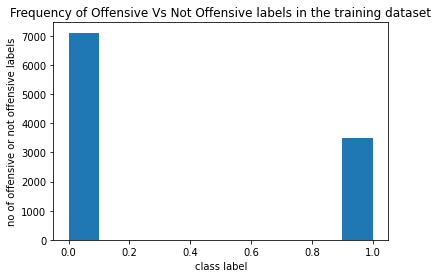

In [45]:
fig,ax = plt.subplots()
ax.hist(y_train_pos_tags)
ax.set_title('Frequency of Offensive Vs Not Offensive labels in the training dataset')
ax.set_xlabel('class label')
ax.set_ylabel('no of offensive or not offensive labels')

### As we have two categories in the label class, we can use classification models to model them

## Classification using the 'tweet' feature

* Classifying using Logistic Regression *

In [46]:
classifier_tweets = LogisticRegression()
classifier_tweets.fit(X_train_tweets, y_train_tweets)
score_tweets = classifier_tweets.score(X_test_tweets, y_test_tweets)

print("Logistic Regression Accuracy using tweets feature:", str(round(score_tweets, 2)))

Logistic Regression Accuracy using tweets feature: 0.76


In [105]:
print(classification_report(y_test_tweets, classifier_tweets.predict(X_test_tweets), target_names=['NOT','OFF']))

              precision    recall  f1-score   support

         NOT       0.75      0.95      0.84      1779
         OFF       0.78      0.36      0.50       869

    accuracy                           0.76      2648
   macro avg       0.77      0.66      0.67      2648
weighted avg       0.76      0.76      0.73      2648



* Classifying using Naive Bayes classifier.

In [47]:
nb_tweets = MultinomialNB()
nb_tweets.fit(X_train_tweets, y_train_tweets)

MultinomialNB()

In [48]:
naive_accuracy_tweets = nb_tweets.score(X_test_tweets, y_test_tweets)

In [49]:
print("Naive Bayes Accuracy using tweets feature:", str(round(naive_accuracy_tweets, 2)))

Naive Bayes Accuracy using tweets feature: 0.72


In [106]:
print(classification_report(y_test_tweets, nb_tweets.predict(X_test_tweets), target_names=['NOT','OFF']))

              precision    recall  f1-score   support

         NOT       0.71      0.98      0.83      1779
         OFF       0.83      0.19      0.31       869

    accuracy                           0.72      2648
   macro avg       0.77      0.59      0.57      2648
weighted avg       0.75      0.72      0.66      2648



### comparison between Logistic Regression and Naive Bayes

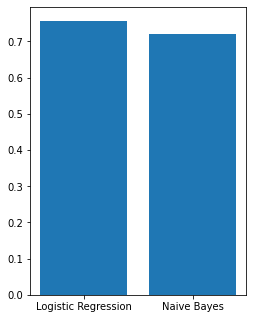

In [50]:
fig_tweets = plt.figure()
ax_tweets = fig_tweets.add_axes([0,0,0.5,1])
langs_tweets = ["Logistic Regression", "Naive Bayes"]
students_tweets = [score_tweets, naive_accuracy_tweets]
ax_tweets.bar(langs_tweets,students_tweets)
plt.show()

## Classification using the 'pos_tags' feature

* Classifying using Logistic Regression

In [51]:
classifier_pos_tags = LogisticRegression()
classifier_pos_tags.fit(X_train_pos_tags, y_train_pos_tags)
score_pos_tags = classifier_pos_tags.score(X_test_pos_tags, y_test_pos_tags)

print("Logistic Regression Accuracy using pos_tags feature:", str(round(score_pos_tags, 2)))

Logistic Regression Accuracy using pos_tags feature: 0.65


In [108]:
print(classification_report(y_test_pos_tags, classifier_pos_tags.predict(X_test_pos_tags), target_names=['NOT','OFF']))

              precision    recall  f1-score   support

         NOT       0.65      1.00      0.79      1733
         OFF       0.00      0.00      0.00       915

    accuracy                           0.65      2648
   macro avg       0.33      0.50      0.40      2648
weighted avg       0.43      0.65      0.52      2648



* Classifying using Naive Bayes classifier.

In [52]:
nb_pos_tags = MultinomialNB()
nb_pos_tags.fit(X_train_pos_tags, y_train_pos_tags)

MultinomialNB()

In [109]:
print(classification_report(y_test_pos_tags, nb_pos_tags.predict(X_test_pos_tags), target_names=['NOT','OFF']))

              precision    recall  f1-score   support

         NOT       0.65      1.00      0.79      1733
         OFF       0.00      0.00      0.00       915

    accuracy                           0.65      2648
   macro avg       0.33      0.50      0.40      2648
weighted avg       0.43      0.65      0.52      2648



C:\Users\USER\AppData\Local\ActiveState\cache\b3f68620\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\ActiveState\cache\b3f68620\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\ActiveState\cache\b3f68620\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Classification using the 'pos_tags_v_adv_adj' feature

* Classifying using Logistic Regression

In [54]:
classifier_pos_tags_v_adv_adj = LogisticRegression()
classifier_pos_tags_v_adv_adj.fit(X_train_pos_tags_v_adv_adj
, y_train_pos_tags_v_adv_adj
)
score_pos_tags_v_adv_adj = classifier_pos_tags_v_adv_adj.score(X_test_pos_tags_v_adv_adj
, y_test_pos_tags_v_adv_adj)

print("Logistic Regression Accuracy using pos_tags feature:", str(round(score_pos_tags_v_adv_adj, 2)))

Logistic Regression Accuracy using pos_tags feature: 0.65


In [110]:
print(classification_report(y_test_pos_tags_v_adv_adj, classifier_pos_tags_v_adv_adj.predict(X_test_pos_tags_v_adv_adj), target_names=['NOT','OFF']))

              precision    recall  f1-score   support

         NOT       0.65      1.00      0.79      1733
         OFF       0.00      0.00      0.00       915

    accuracy                           0.65      2648
   macro avg       0.33      0.50      0.40      2648
weighted avg       0.43      0.65      0.52      2648



C:\Users\USER\AppData\Local\ActiveState\cache\b3f68620\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\ActiveState\cache\b3f68620\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\ActiveState\cache\b3f68620\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

* Classifying using Naive Bayes classifier.

In [55]:
nb_pos_tags_v_adv_adj = MultinomialNB()
nb_pos_tags_v_adv_adj.fit(X_train_pos_tags_v_adv_adj, y_train_pos_tags_v_adv_adj)

MultinomialNB()

In [56]:
naive_accuracy_pos_tags_v_adv_adj = nb_pos_tags_v_adv_adj.score(X_test_pos_tags_v_adv_adj
, y_test_pos_tags_v_adv_adj)

print("Naive Bayes Accuracy using pos_tags_v_adv_adj feature:", str(round(naive_accuracy_pos_tags_v_adv_adj, 2)))

Naive Bayes Accuracy using pos_tags_v_adv_adj feature: 0.65


In [111]:
print(classification_report(y_test_pos_tags_v_adv_adj, nb_pos_tags_v_adv_adj.predict(X_test_pos_tags_v_adv_adj), target_names=['NOT','OFF']))

              precision    recall  f1-score   support

         NOT       0.65      1.00      0.79      1733
         OFF       0.00      0.00      0.00       915

    accuracy                           0.65      2648
   macro avg       0.33      0.50      0.40      2648
weighted avg       0.43      0.65      0.52      2648



C:\Users\USER\AppData\Local\ActiveState\cache\b3f68620\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\ActiveState\cache\b3f68620\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\ActiveState\cache\b3f68620\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# now combining tweets with their pos tags

In [57]:
df_subtask_a['tweets_combined_pos'] = df_subtask_a['tweet']+df_subtask_a['pos_tags']

In [58]:
df_subtask_a.head()

,tweet,subtask_a,pos_tags,pos_tags_v_adv_adj,tweets_combined_pos
0,ask native americans take,OFF,verb adj propn verb,verb adj verb,ask native americans take verb adj propn verb
1,go home youre drunk maga trump,OFF,verb adv pron verb adj noun noun,verb adv verb adj,go home youre drunk maga trump verb adv pron v...
2,amazon investigating chinese employees selling...,NOT,propn verb adj noun verb adj noun verb noun ve...,verb adj verb adj verb verb adj,amazon investigating chinese employees selling...
3,someone shouldvetaken piece shit volcano,OFF,pron verb noun noun noun,verb,someone shouldvetaken piece shit volcano pron ...
4,obama wanted liberals illegals move red states,NOT,propn verb noun noun verb adj noun,verb verb adj,obama wanted liberals illegals move red states...


In [59]:
sen = df_subtask_a['tweets_combined_pos'].values

In [60]:
sen_train_combine, sen_test_combine, y_train_combine, y_test_combine = train_test_split(sen, y, test_size=0.20, random_state=1000)
tfidfvectorizer_combined = TfidfVectorizer(analyzer='word',stop_words= 'english')

tfidfvectorizer_combined.fit(sen_train_combine)

X_train_combine = tfidfvectorizer_combined.transform(sen_train_combine)
X_test_combine  = tfidfvectorizer_combined.transform(sen_test_combine)
X_train_tweets

<10592x17482 sparse matrix of type '<class 'numpy.float64'>'
	with 94429 stored elements in Compressed Sparse Row format>

In [61]:
offensive = 0
for value in y_test_combine:
    if value == 1:
        
        offensive += 1

In [62]:
print("number of offensive tags in y_test_combine data", offensive)

number of offensive tags in y_test_combine data 869


In [63]:
classifier_combine = LogisticRegression()
classifier_combine.fit(X_train_combine, y_train_combine)
score_combine = classifier_combine.score(X_test_combine, y_test_combine)
print("Logistic Regression Accuracy using tweets_combined_pos feature:", str(round(score_combine, 2)))

Logistic Regression Accuracy using tweets_combined_pos feature: 0.75


# Visualizing using Confusion Matrix

* As the highest accuracy I got is .75 for Logistic regression using both tweet feature and tweets_combined_pos feature, I am using a confusion matrix to see prediction accuracy for each category

Text(0, 0.5, 'no of offensive or not offensive labels')

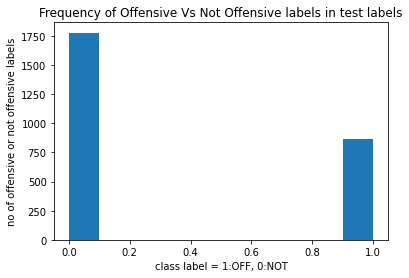

In [64]:
fig,ax = plt.subplots()
ax.hist(y_test_combine)
ax.set_title('Frequency of Offensive Vs Not Offensive labels in test labels')
ax.set_xlabel('class label = 1:OFF, 0:NOT')
ax.set_ylabel('no of offensive or not offensive labels')

In [65]:
mat=confusion_matrix(classifier_combine.predict(X_test_combine), y_test_combine)
print(mat)

[[1650  525]
 [ 129  344]]


Text(33.0, 0.5, 'Predicted label for Logistic Regression')

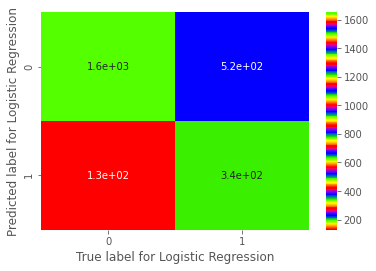

In [122]:
from seaborn import heatmap
heatmap(mat , cmap="prism", annot=True)
plt.xlabel("True label for Logistic Regression")
plt.ylabel("Predicted label for Logistic Regression")

* for logistic regression

In [124]:
print(classification_report(y_test_combine, classifier_combine.predict(X_test_combine), target_names=['NOT','OFF']))

              precision    recall  f1-score   support

         NOT       0.76      0.93      0.83      1779
         OFF       0.73      0.40      0.51       869

    accuracy                           0.75      2648
   macro avg       0.74      0.66      0.67      2648
weighted avg       0.75      0.75      0.73      2648



* for Naive Bayes

In [112]:
nb_combined = MultinomialNB()
nb_combined.fit(X_train_combine, y_train_combine)

MultinomialNB()

In [123]:
print(classification_report(y_test_combine, nb_combined.predict(X_test_combine), target_names=['NOT','OFF']))

              precision    recall  f1-score   support

         NOT       0.70      0.99      0.82      1779
         OFF       0.86      0.14      0.24       869

    accuracy                           0.71      2648
   macro avg       0.78      0.57      0.53      2648
weighted avg       0.75      0.71      0.63      2648



# Neural Network Model

In [69]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn.preprocessing import MinMaxScaler

In [70]:
sen_train_combine_nn, sen_test_combine_nn, y_train_combine_nn, y_test_combine_nn = train_test_split(sen, y, test_size=0.20, random_state=42)


In [71]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sen_train_combine_nn)
X_train_nn = tokenizer.texts_to_sequences(sen_train_combine_nn)
X_test_nn = tokenizer.texts_to_sequences(sen_test_combine_nn)

### creating embedding

In [72]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath,"r",encoding="utf-8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [73]:
embedding_dim = 100
embedding_matrix = create_embedding_matrix(
    'C:\\Users\\USER\\Downloads\\440\\New folder\\Assignment 2\\glove6B100d.txt',
    tokenizer.word_index, embedding_dim)

In [74]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.3003    ,  0.85930997, -0.066927  , ..., -0.46044999,
         0.15888999,  0.4517    ],
       [-0.03256   ,  0.99294001, -0.36622   , ..., -0.56173998,
        -0.22282   ,  0.24939001],
       ...,
       [-0.087     ,  0.17776   , -0.10539   , ..., -0.44029999,
         0.049846  ,  0.39524001],
       [-0.46167001, -0.34029999, -0.3874    , ..., -0.14184999,
        -0.34796   ,  0.22495   ],
       [ 0.47510999,  0.30752999,  0.34804001, ..., -0.14168   ,
        -0.42387   ,  0.97201002]])

In [75]:
vocab_size = len(tokenizer.word_index)+1

### padding to max length = 100

In [76]:
maxlen = 100

X_train_nn = pad_sequences(X_train_nn, padding='post', maxlen=maxlen)
X_test_nn = pad_sequences(X_test_nn, padding='post', maxlen=maxlen)

In [77]:
print(X_train_nn[1, :])

[ 388   17 1312 5265  460 2078 4095 1144 1071 5266  194 2078  104 1503
  973  194 7598  378 7599    4    4    2    2    3    1    5    2    3
    1    1    1    2    1    3    1    4    4    4    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


### creating the model

In [78]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1753300   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                100010    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,853,321
Trainable params: 100,021
Non-trainable params: 1,753,300
_________________________________________________________________


In [85]:
y_train_combine_nn = y_train_combine_nn.astype(np.int16)
y_test_combine_nn = y_test_combine_nn.astype(np.int16)

In [86]:
history = model.fit(X_train_nn, y_train_combine_nn,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test_nn, y_test_combine_nn),
                    batch_size=20)


In [87]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [92]:
loss, accuracy = model.evaluate(X_train_nn, y_train_combine_nn, verbose=False)
print("Training Accuracy: {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_nn, y_test_combine_nn, verbose=True)
print("Testing Accuracy:  {:.2f}".format(accuracy))

Training Accuracy: 0.76
83/83 [==============================] - 0s 2ms/step - loss: 1.4868 - accuracy: 0.6005
Testing Accuracy:  0.60


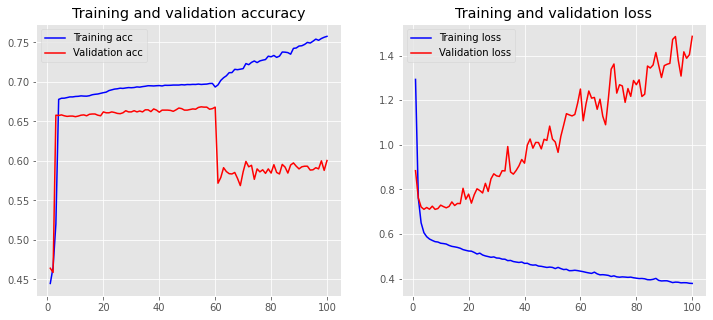

In [93]:
plot_history(history)

In [118]:
 # predict probabilities for test set
yhat_probs = model.predict(X_test_nn, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test_nn, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_combine_nn, yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test_combine_nn, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_combine_nn, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_combine_nn, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.600453
Precision: 0.452174
Recall: 0.738798
F1 score: 0.560996


C:\Users\USER\AppData\Local\ActiveState\cache\b3f68620\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [119]:
# confusion matrix
matrix = confusion_matrix(y_test_combine_nn, yhat_classes)
print(matrix)

[[914 819]
 [239 676]]


Text(33.0, 0.5, 'Predicted label for RNN')

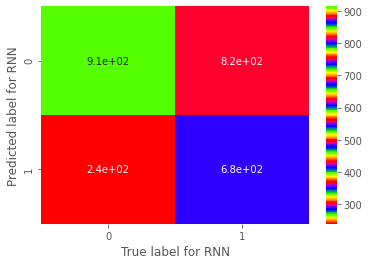

In [121]:
from seaborn import heatmap
heatmap(matrix , cmap="prism", annot=True)
plt.xlabel("True label for RNN")
plt.ylabel("Predicted label for RNN")